# **MOCK EXAM**

# Mock Exam for NLP

## Part 1: Text Preprocessing and Exploration
*Using "Alice’s Adventures in Wonderland"*

**Task 1: Tokenization**
- Tokenize the text into words and sentences.

**Task 2: Text Cleaning**
- Remove special characters and punctuation; convert to lowercase.

**Task 3: Stopword Removal**
- Eliminate stopwords using NLTK's predefined list.

## Part 2: Text Analysis and Linguistic Features
*Using "The Adventures of Sherlock Holmes"*

**Task 4: Frequency Analysis**
- Calculate the frequency distribution of words; identify top 10 words.

**Task 5: Lexical Diversity**
- Measure the diversity of the text's vocabulary.

**Task 6: Collocations and N-grams**
- Find significant collocations; generate bigrams and trigrams.

## Part 3: Contextual Understanding and Visualization
*Using "Moby Dick"*

**Task 7: Concordance Analysis**
- Use concordance to study "whale" in its textual context.

**Task 8: Similar Words and Common Contexts**
- Find words with similar usage to "ship" and explore common contexts between "whale" and "sea".

**Task 9: Dispersion Plots**
- Visualize the occurrences of key maritime-related words throughout the text.

## Part 4: Advanced Text Processing Techniques
*Using a Sample Web Text such as "Firefox.txt"*

**Task 10: Stemming and Lemmatization**
- Compare the effects of these techniques on the text.

**Task 11: Part-of-Speech Tagging**
- Automatically tag words with their parts of speech.

**Task 12: Named Entity Recognition**
- Identify and categorize named entities using SpaCy.

## Part 5: Word Embeddings and Sentence Similarity
*Using SpaCy's "en_core_web_md" Model*

**Task 13: Exploring Word Vectors**
- Examine the vector representation of "queen" and "king".

**Task 14: Sentence Similarity**
- Compute the similarity between "I have a pet." and "Dogs are animals."

## Part 6: Machine Learning for NLP
*Using the SA Dataset for Sentiment Analysis*

**Task 15: Text Classification**
- Prepare data, train a model to classify positive and negative sentiments.

**Task 16: Model Evaluation**
- Use metrics such as accuracy, precision, recall, and F1-score to evaluate the model.

## Part 7: Text Generation with LSTM
*Using articles from the `text_generation_dataset` folder*

**Task 17: Data Preparation**
- Load the text data and preprocess it for the LSTM model.
- This involves tokenization and encoding the text into sequences.

**Task 18: Building the LSTM Model**
- Define and compile a simple LSTM model to predict the next character in a sequence.

**Task 19: Model Training**
- Train the LSTM model on the preprocessed text data.

**Task 20: Text Generation**
- Use the trained model to generate text.


## Data Loading and needed installations

In [1]:
#!pip install nltk
#!pip install matplotlib
#!pip install spacy
#!python -m spacy download en_core_web_md

In [2]:
import nltk
from nltk.corpus import webtext
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import math 
import string
import re
import unicodedata
from collections import Counter

#!spacy download en_core_web_md


nltk.download('book')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('inaugural')
nltk.download('treebank')


firefox_text = webtext.raw('firefox.txt')
firefox_tokens = nltk.word_tokenize(firefox_text)

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/ndelafuente/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/ndelafuente/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/ndelafuente/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/ndelafuente/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/ndelafuente/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/ndelafuente/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date

### Load data

In [3]:

# "Alice’s Adventures in Wonderland"
with open('./exam_data/alice.txt', 'r', encoding='utf-8') as file:
    alice_text = file.read()

# "The Adventures of Sherlock Holmes"
with open('./exam_data/Adventures_Holmes.txt', 'r', encoding='utf-8') as file:
    holmes_text = file.read()

# "moby_dick"
with open('./exam_data/moby_dick.txt', 'r', encoding='utf-8') as file:
    moby_dick_text = file.read()
    
#Firefox.txt
firefox_text = webtext.raw('firefox.txt')

# "Anna"
with open('exam_data/anna.txt', 'r', encoding = 'utf-8') as file:
    anna_text = file.read()
    
# Alexa Reviews
with open('./exam_data/alexa_reviews.tsv', 'r', encoding='utf-8') as file:
    alexa_reviews = file.readlines()

# SA (Sentiment Analysis) Dataset
import pandas as pd
sa_dataset = pd.read_csv('./exam_data/SA_dataset.csv', delimiter=',')

# Text Generation Dataset
text_generation_dataset = []
text_generation_dataset_path = "./exam_data/text_generation_dataset/"

# Ensure the directory exists
if os.path.exists(text_generation_dataset_path):
    # Iterate over each file in the directory
    for article_filename in os.listdir(text_generation_dataset_path):
        # Construct the full file path
        article_path = os.path.join(text_generation_dataset_path, article_filename)
        # Check if it's a file and not a directory
        if os.path.isfile(article_path):
            # Open and read the contents of the file
            try:
                with open(article_path, 'r', encoding='utf-8') as file:
                    articles_text = file.read()
                    text_generation_dataset.append(articles_text)
            except Exception as e:
                print(f"Error reading {article_path}: {e}")

#Print info of the datasets just to check if they are loaded correctly
print(f"Firefox text: {len(firefox_text)} characters")
print(f"Alice text: {len(alice_text)} characters")
print(f"Sherlock Holmes text: {len(holmes_text)} characters")
print(f"Moby dick text: {len(moby_dick_text)} characters")
print(f"Firefox text: {len(firefox_text)} characters")
print(f"Anna text: {len(anna_text)} characters")
print(f"Alexa reviews: {len(alexa_reviews)} lines")
print(f"SA dataset: {len(sa_dataset)} rows")
print(f"Text generation dataset: {len(text_generation_dataset)} articles")

Firefox text: 564601 characters
Alice text: 163815 characters
Sherlock Holmes text: 580632 characters
Moby dick text: 1238254 characters
Firefox text: 564601 characters
Anna text: 1985223 characters
Alexa reviews: 3151 lines
SA dataset: 5000 rows
Text generation dataset: 9 articles



## **Part 1: Text Preprocessing and Exploration**
*Using "Alice’s Adventures in Wonderland"*

**Task 1: Tokenization**
- Tokenize the text into words and sentences.

**Task 2: Text Cleaning**
- Remove special characters and punctuation; convert to lowercase.

**Task 3: Stopword Removal**
- Eliminate stopwords using NLTK's predefined list.

**Additional Task: Compute Basic Text Statistics and Lexical Diversity**


#### Task 1: Tokenization

In [4]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string


# Tokenize the text into words and sentences
alice_words = word_tokenize(alice_text)
alice_sentences = sent_tokenize(alice_text)
print(f"Number of words: {len(alice_words)}")
print(f"Number of sentences: {len(alice_sentences)}")


Number of words: 38349
Number of sentences: 1093


#### Task 2: Text Cleaning

In [5]:


# Remove special characters and punctuation; convert to lowercase
translator = str.maketrans('', '', string.punctuation)
alice_words_clean = [word.translate(translator).lower() for word in alice_words if word.isalpha()]
print(f"Total number of words before cleaning: {len(alice_words)}")
print(f"Total number of words after cleaning: {len(alice_words_clean)}")
print(f"Sample words after cleaning: {alice_words_clean[:100]}")


Total number of words before cleaning: 38349
Total number of words after cleaning: 29744
Sample words after cleaning: ['project', 'gutenberg', 's', 'alice', 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'title', 'alice', 's', 'adventures', 'in', 'wonderland', 'author', 'lewis', 'carroll', 'posting', 'date', 'june', 'ebook', 'release', 'date', 'march', 'last', 'updated', 'october', 'language', 'english', 'character', 'set', 'encoding', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'alice', 's', 'adventures', 'in', 'wonderland', 'alice', 's', 'adventures', 'in', 'wonderland', 'lewis', 'carroll', 'the', 'millennium', 'f

#### Task 3: Stopword Removal

In [6]:


# Eliminate stopwords using NLTK's predefined list
stop_words = set(stopwords.words('english'))
alice_words_final = [word for word in alice_words_clean if word not in stop_words]
print(f"Total number of words before stopword removal: {len(alice_words_clean)}")
print(f"Total number of words after stopword removal: {len(alice_words_final)}")
print(f"Sample words after stopword removal: {alice_words_final[:100]}")


Total number of words before stopword removal: 29744
Total number of words after stopword removal: 13446
Sample words after stopword removal: ['project', 'gutenberg', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'title', 'alice', 'adventures', 'wonderland', 'author', 'lewis', 'carroll', 'posting', 'date', 'june', 'ebook', 'release', 'date', 'march', 'last', 'updated', 'october', 'language', 'english', 'character', 'set', 'encoding', 'start', 'project', 'gutenberg', 'ebook', 'alice', 'adventures', 'wonderland', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'chapter', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thoug

#### Additional Task: Compute Basic Text Statistics and Lexical Diversity

In [7]:


# Total number of words
total_words = len(alice_words_final)
# Number of unique words
unique_words = len(set(alice_words_final))
# Lexical diversity
lexical_diversity = unique_words / total_words
print(f"Total number of words: {total_words}")
print(f"Number of unique words: {unique_words}")
print(f"Lexical Diversity: {lexical_diversity}")

Total number of words: 13446
Number of unique words: 2772
Lexical Diversity: 0.20615796519410978



---------------------------------------------------------


## **Part 2: Text Analysis and Linguistic Features**
*Using "The Adventures of Sherlock Holmes"*

**Task 4: Frequency Analysis**
- Calculate the frequency distribution of words; identify top 10 words.

**Task 5: Lexical Diversity**
- Measure the diversity of the text's vocabulary.

**Task 6: Collocations and N-grams**
- Find significant collocations; generate bigrams and trigrams.



#### Task 4: Frequency Analysis


In [8]:
# Import necessary libraries
from nltk import FreqDist, bigrams, trigrams, collocations
import matplotlib.pyplot as plt

# Preprocessing: Tokenization and cleaning
holmes_tokens = [word.lower() for word in word_tokenize(holmes_text) if word.isalpha()]

# Calculate the frequency distribution of words and identify top 10 words
fdist = FreqDist(holmes_tokens)
top_10_words = fdist.most_common(10)
print("Top 10 most common words:", top_10_words)

Top 10 most common words: [('the', 5791), ('and', 3064), ('i', 3026), ('of', 2767), ('to', 2759), ('a', 2680), ('in', 1814), ('that', 1752), ('it', 1699), ('you', 1528)]


#### Task 5: Lexical Diversity

In [9]:
# Measure the diversity of the text's vocabulary
total_words = len(holmes_tokens)
unique_words = len(set(holmes_tokens))
lexical_diversity = unique_words / total_words
print(f"Lexical Diversity: {lexical_diversity}")

Lexical Diversity: 0.07385822572658363



#### Task 6: Collocations and N-grams

In [10]:
# Find significant collocations
bigram_measures = collocations.BigramAssocMeasures()
finder = collocations.BigramCollocationFinder.from_words(holmes_tokens)
significant_collocations = finder.nbest(bigram_measures.pmi, 10)  # top 10
print("Significant Collocations:", significant_collocations)

# Generate bigrams and trigrams
generated_bigrams = list(bigrams(holmes_tokens))
generated_trigrams = list(trigrams(holmes_tokens))
print("Sample Bigrams:", generated_bigrams[:10])
print("Sample Trigrams:", generated_trigrams[:10])

Significant Collocations: [('abusive', 'expressions'), ('accepting', 'unsolicited'), ('alicia', 'whittington'), ('alley', 'lurking'), ('alteration', 'modification'), ('amply', 'repaid'), ('anatomy', 'unsystematic'), ('apache', 'indians'), ('arnsworth', 'castle'), ('atkinson', 'brothers')]
Sample Bigrams: [('adventures', 'of'), ('of', 'sherlock'), ('sherlock', 'holmes'), ('holmes', 'by'), ('by', 'arthur'), ('arthur', 'conan'), ('conan', 'doyle'), ('doyle', 'contents'), ('contents', 'i'), ('i', 'a')]
Sample Trigrams: [('adventures', 'of', 'sherlock'), ('of', 'sherlock', 'holmes'), ('sherlock', 'holmes', 'by'), ('holmes', 'by', 'arthur'), ('by', 'arthur', 'conan'), ('arthur', 'conan', 'doyle'), ('conan', 'doyle', 'contents'), ('doyle', 'contents', 'i'), ('contents', 'i', 'a'), ('i', 'a', 'scandal')]


#### Extra Task: Visualize Frequency Distribution

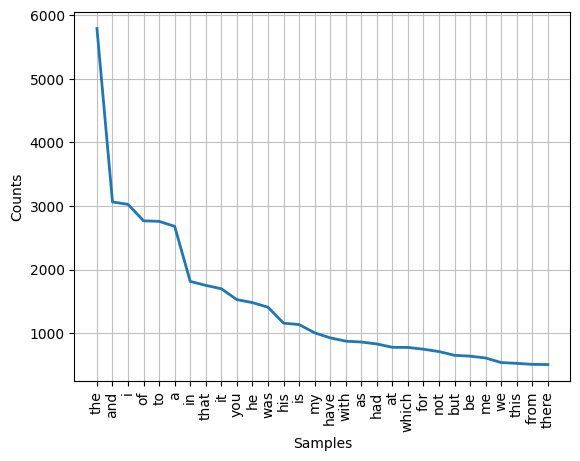

In [11]:
# Plot the frequency distribution of the top 30 most common words
fdist.plot(30, cumulative=False)
plt.show()

-----------------------------------

## **Part 3: Contextual Understanding and Visualization**
*Using "Moby Dick"*

**Task 7: Concordance Analysis**
- Use concordance to study "whale" in its textual context.

**Task 8: Similar Words and Common Contexts**
- Find words with similar usage to "ship" and explore common contexts between "whale" and "sea".

**Task 9: Dispersion Plots**
- Visualize the occurrences of key maritime-related words throughout the text.




In [12]:
# Import necessary libraries
from nltk.text import Text

# Preprocessing: Tokenization and Text object creation
moby_tokens = word_tokenize(moby_dick_text.lower())
moby_nltk_text = Text(moby_tokens)

#### Task 7: Concordance Analysis

In [13]:
# Use concordance to study "whale" in its textual context
moby_nltk_text.concordance("whale")



Displaying 25 of 1075 matches:
utenberg ebook of moby dick ; or the whale , by herman melville this ebook is f
nberg.org title : moby dick ; or the whale author : herman melville release dat
t gutenberg ebook moby dick ; or the whale * * * produced by daniel lazarus , j
nd david widger moby-dick ; or , the whale . by herman melville contents etymol
k . chapter 42. the whiteness of the whale . chapter 43. hark ! chapter 44. the
the line . chapter 61. stubb kills a whale . chapter 62. the dart . chapter 63.
. stubb ’ s supper . chapter 65. the whale as a dish . chapter 66. the shark ma
ter 73. stubb and flask kill a right whale ; and then have a talk over him . ch
alk over him . chapter 74. the sperm whale ’ s head—contrasted view . chapter 7
trasted view . chapter 75. the right whale ’ s head—contrasted view . chapter 7
es . chapter 103. measurement of the whale ’ s skeleton . chapter 104. the foss
s skeleton . chapter 104. the fossil whale . chapter 105. does the whale ’ s ma
fossil wh

In [14]:
# Use concordance to study "intelligence" in its textual context
moby_nltk_text.concordance("intelligence")

Displaying 7 of 7 matches:
ather to spring , somehow , from intelligence than from ignorance . outward po
e instinct—say , rather , secret intelligence from the deity—mostly swim in _v
would receive the latest whaling intelligence from the cruising-ground to whic
 made . greedily sucking in this intelligence , gabriel solemnly warned the ca
c part of him as the seat of his intelligence . it is plain , then , that phre
 argue some uncommon vivacity of intelligence . but not precisely so . for not
 moby dick , with that malicious intelligence ascribed to him , sidelingly tra


#### Task 8: Similar Words and Common Contexts

In [15]:
# Find words with similar usage to "ship"
print("Words similar to 'ship':")
moby_nltk_text.similar("ship")

# Explore common contexts between "whale" and "sea"
print("Common contexts for 'whale' and 'sea':")
moby_nltk_text.common_contexts(["whale", "sea"])


Words similar to 'ship':
whale boat sea world captain crew man pequod head way time line deck
other body water boats air devil side
Common contexts for 'whale' and 'sea':
the_is the_and the_the the_as the_in the_was the_i the_by the_which
the_when the_so the_all the_had the_with the_to the_chapter the_that
the_a the_but the_of


#### Task 9: Dispersion Plots

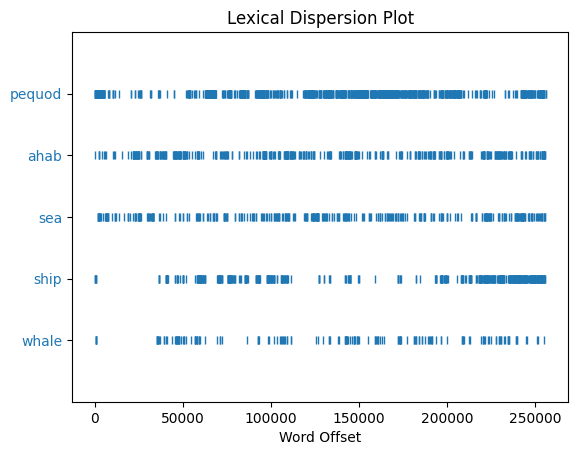

In [16]:
# Visualize the occurrences of key maritime-related words throughout the text
words_of_interest = ["whale", "ship", "sea", "ahab", "pequod"]
moby_nltk_text.dispersion_plot(words_of_interest)

#### Extra Task: Content Analysis

In [17]:
# Count the mention of key thematic words and analyze their significance
thematic_words = ['whale', 'ship', 'sea', 'ahab', 'pequod', 'ocean']
word_freq = FreqDist(moby_nltk_text)
thematic_word_counts = {word: word_freq[word] for word in thematic_words}
print("Thematic word counts:", thematic_word_counts)

Thematic word counts: {'whale': 1075, 'ship': 460, 'sea': 375, 'ahab': 494, 'pequod': 175, 'ocean': 70}


-------------------------------------------------------------


## **Part 4: Advanced Text Processing Techniques**
*Using a Sample Web Text such as "Firefox.txt"*

**Task 10: Stemming and Lemmatization**
- Compare the effects of these techniques on the text.

**Task 11: Part-of-Speech Tagging**
- Automatically tag words with their parts of speech.

**Task 12: Named Entity Recognition**
- Identify and categorize named entities using SpaCy.

In [18]:
# Import necessary libraries
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
import spacy

# Load SpaCy's English tokenizer
nlp = spacy.load('en_core_web_md')

# Preprocessing: Tokenization
firefox_tokens = word_tokenize(firefox_text.lower())


#### Task 10: Stemming and Lemmatization

In [19]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming and lemmatization
stems = [stemmer.stem(token) for token in firefox_tokens]
lemmas = [lemmatizer.lemmatize(token) for token in firefox_tokens]

print("Sample stems:", stems[:20])
print("Sample lemmas:", lemmas[:20])


Sample stems: ['cooki', 'manag', ':', '``', 'do', "n't", 'allow', 'site', 'that', 'set', 'remov', 'cooki', 'to', 'set', 'futur', 'cooki', "''", 'should', 'stay', 'check']
Sample lemmas: ['cookie', 'manager', ':', '``', 'do', "n't", 'allow', 'site', 'that', 'set', 'removed', 'cooky', 'to', 'set', 'future', 'cooky', "''", 'should', 'stay', 'checked']


#### Task 11: Part-of-Speech Tagging

In [20]:
# Automatically tag words with their parts of speech
pos_tags = pos_tag(firefox_tokens)
print("Sample POS tags:", pos_tags[:20])

Sample POS tags: [('cookie', 'NN'), ('manager', 'NN'), (':', ':'), ('``', '``'), ('do', 'VBP'), ("n't", 'RB'), ('allow', 'VB'), ('sites', 'NNS'), ('that', 'WDT'), ('set', 'VBP'), ('removed', 'VBN'), ('cookies', 'NNS'), ('to', 'TO'), ('set', 'VB'), ('future', 'JJ'), ('cookies', 'NNS'), ("''", "''"), ('should', 'MD'), ('stay', 'VB'), ('checked', 'VBD')]


#### Task 12: Named Entity Recognition

In [21]:
# Identify and categorize named entities using SpaCy
doc = nlp(firefox_text)
named_entities = [(entity.text, entity.label_) for entity in doc.ents]
print("Sample Named Entities:", named_entities[:20])

Sample Named Entities: [('Phoenix', 'GPE'), ('UI', 'ORG'), ('Mozilla', 'ORG'), ('second', 'ORDINAL'), ('Phoenix', 'GPE'), ('Mozilla', 'ORG'), ('Phoenix', 'GPE'), ('Satchel', 'PERSON'), ('Mousing', 'ORG'), ('second', 'ORDINAL'), ('ptoolbar', 'GPE'), ('Customising', 'GPE'), ('160019', 'CARDINAL'), ('Quick Launch (Turbo', 'PRODUCT'), ('URLbar', 'ORG'), ('second', 'ORDINAL'), ('the Navigation Toolbar', 'ORG'), ('Uabar', 'ORG'), ('Theme', 'ORG'), ('Options', 'ORG')]


#### Extra Task: Dependency Parsing

In [22]:
# Analyze the sentence structure using dependency parsing
sample_sentence = list(doc.sents)[0]
dependencies = [(token.text, token.dep_, token.head.text) for token in sample_sentence]
print("Dependencies in the first sentence:", dependencies)

Dependencies in the first sentence: [('Cookie', 'compound', 'Manager'), ('Manager', 'dep', 'allow'), (':', 'punct', 'Manager'), ('"', 'punct', 'allow'), ('Do', 'aux', 'allow'), ("n't", 'neg', 'allow'), ('allow', 'ROOT', 'allow'), ('sites', 'dobj', 'allow'), ('that', 'nsubj', 'set'), ('set', 'relcl', 'sites'), ('removed', 'amod', 'cookies'), ('cookies', 'dobj', 'set'), ('to', 'aux', 'set'), ('set', 'advcl', 'set'), ('future', 'amod', 'cookies'), ('cookies', 'dobj', 'set'), ('"', 'punct', 'sites'), ('should', 'aux', 'stay'), ('stay', 'ccomp', 'allow'), ('checked', 'acomp', 'stay'), ('\r\n', 'dep', 'checked')]



## **Part 5: Word Embeddings and Sentence Similarity**
*Using SpaCy's "en_core_web_md" Model*

**Task 13: Exploring Word Vectors**
- Examine the vector representation of "queen" and "king".

**Task 14: Sentence Similarity**
- Compute the similarity between "I have a pet." and "Dogs are animals."

In [23]:
# Import necessary libraries
import spacy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load SpaCy's English model
nlp = spacy.load('en_core_web_md')

#### Task 13: Exploring Word Vectors

In [24]:
# Examine the vector representation of "queen" and "king"
queen = nlp("queen")
king = nlp("king")

print("Vector for 'queen':", queen.vector[:5])  # Display first 5 elements for brevity
print("Vector for 'king':", king.vector[:5])    # Display first 5 elements for brevity

#Compute the similarity between "queen" and "king"
similarity = queen.similarity(king)
print("Similarity between 'queen' and 'king':",str(similarity*100)+"%")


Vector for 'queen': [ 2.167    0.29991 -3.1277  -2.7817  -0.26743]
Vector for 'king': [-0.11296 -4.1865  -1.8453   0.30781  2.4956 ]
Similarity between 'queen' and 'king': 61.08841628588695%


#### Task 14: Sentence Similarity

In [25]:
# Compute the similarity between "I have a pet." and "Dogs are animals."
sentence1 = nlp("I have a pet.")
sentence2 = nlp("Dogs are animals.")
similarity_score = sentence1.similarity(sentence2)
print("Similarity between sentences:", similarity_score)

Similarity between sentences: 0.4070589692292363


In [26]:
# Compute the similarity between "I have a pet." and "We enjoy nlp."
sentence1 = nlp("I have a pet.")
sentence2 = nlp("We enjoy nlp.")
similarity_score = sentence1.similarity(sentence2)
print("Similarity between sentences:", similarity_score)

Similarity between sentences: 0.6292748338239498


#### Extra Task: Clustering Word Vectors

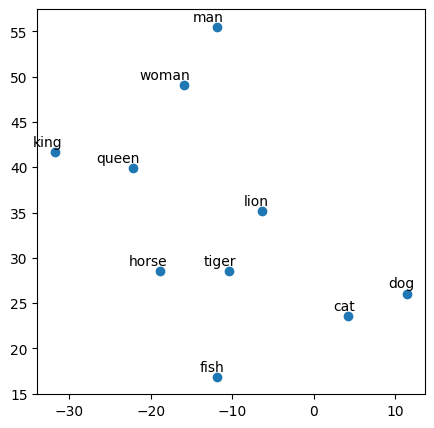

In [27]:
# To visualize semantic relationships, let's perform a clustering of selected word vectors

words = ["dog", "cat", "fish", "horse", "lion", "tiger", "queen", "king", "woman", "man"]
word_vectors = [nlp(word).vector for word in words]

# Convert list of vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plotting the results
plt.figure(figsize=(5, 5))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()


## **Part 6: Machine Learning for NLP**
*Using the SA Dataset for Sentiment Analysis*

**Task 15: Text Classification**
- Prepare data, train a model to classify positive and negative sentiments.

**Task 16: Model Evaluation**
- Use metrics such as accuracy, precision, recall, and F1-score to evaluate the model.


In [28]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Preprocessing: Extract features and labels
X = sa_dataset['Review']
y = sa_dataset['Sentiment']

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [29]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("-------------------")
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("-------------------")
print("y_train distribution:", y_train.value_counts())
print("y_test distribution:", y_test.value_counts())
print("-------------------")
print("X_train sample:", X_train[:5])
print("y_train sample:", y_train[:5])
print("-------------------")
print("X_test sample:", X_test[:5])
print("y_test sample:", y_test[:5])

X_train shape: (4000, 17769)
X_test shape: (1000, 17769)
-------------------
y_train shape: (4000,)
y_test shape: (1000,)
-------------------
y_train distribution: Sentiment
1    2214
0    1786
Name: count, dtype: int64
y_test distribution: Sentiment
1    536
0    464
Name: count, dtype: int64
-------------------
X_train sample:   (0, 15772)	6
  (0, 10329)	4
  (0, 15846)	1
  (0, 10916)	2
  (0, 8269)	5
  (0, 2275)	1
  (0, 8294)	3
  (0, 6727)	1
  (0, 7884)	2
  (0, 772)	5
  (0, 10766)	1
  (0, 1964)	1
  (0, 14518)	2
  (0, 16004)	4
  (0, 4645)	1
  (0, 8757)	1
  (0, 17338)	1
  (0, 9122)	1
  (0, 17238)	1
  (0, 8549)	1
  (0, 16872)	1
  (0, 6365)	1
  (0, 10447)	1
  (0, 17128)	2
  (0, 975)	1
  :	:
  (4, 15213)	1
  (4, 12041)	1
  (4, 3152)	1
  (4, 14436)	1
  (4, 11810)	1
  (4, 11642)	1
  (4, 7114)	1
  (4, 7377)	1
  (4, 5465)	1
  (4, 75)	1
  (4, 15210)	1
  (4, 2212)	1
  (4, 13669)	1
  (4, 187)	1
  (4, 2014)	1
  (4, 2067)	1
  (4, 15297)	1
  (4, 3035)	1
  (4, 16892)	1
  (4, 1456)	2
  (4, 6796)	1
  (

#### Task 15: Text Classification

In [30]:
# Train a Naive Bayes classifier
model1 = MultinomialNB()
model1.fit(X_train, y_train)

model2 = SVC(kernel='linear')
model2 = model2.fit(X_train, y_train)

#### Task 16: Model Evaluation

In [31]:
# Predict sentiments for test data
y_pred_NB = model1.predict(X_test)
y_pred_SVC = model2.predict(X_test)

# Calculate performance metrics
accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)

precision_NB = precision_score(y_test, y_pred_NB, pos_label=1)
precision_SVC = precision_score(y_test, y_pred_SVC)

recall_NB = recall_score(y_test, y_pred_NB, pos_label=1)
recall_SVC = recall_score(y_test, y_pred_SVC, pos_label=1)

f1_NB = f1_score(y_test, y_pred_NB, pos_label=1)
f1_SVC = f1_score(y_test, y_pred_SVC, pos_label=1)

print(f"Accuracy NB: {accuracy_NB}")
print(f"Accuracy SVC: {accuracy_SVC}\n")

print(f"Precision NB: {precision_NB}")
print(f"Precision SVC: {precision_SVC}\n")

print(f"Recall NB: {recall_NB}")
print(f"Recall SVC: {recall_SVC}\n")

print(f"F1 Score NB: {f1_NB}")
print(f"F1 Score SVC: {f1_SVC}\n")


Accuracy NB: 0.861
Accuracy SVC: 0.839

Precision NB: 0.8930693069306931
Precision SVC: 0.8803245436105477

Recall NB: 0.8414179104477612
Recall SVC: 0.8097014925373134

F1 Score NB: 0.866474543707973
F1 Score SVC: 0.8435374149659864




## **Part 7: Text Generation with LSTM**
*Using articles from the `text_generation_dataset` folder*

*Alternatively use `anna.txt`*

**Task 17: Data Preparation**
- Load the text data and preprocess it for the LSTM model.
- This involves tokenization and encoding the text into sequences.

**Task 18: Building the LSTM Model**
- Define and compile a simple LSTM model to predict the next character in a sequence.

**Task 19: Model Training**
- Train the LSTM model on the preprocessed text data.

**Task 20: Text Generation**
- Use the trained model to generate text.


**Tokenization**


In the second cell, below, I'm creating a couple dictionaries to convert the characters to and from integers. Encoding the characters as integers makes it easier to use as input in the network. encode it as integers.

In [32]:
# encode the text and map each character to an integer and vice versa

# we create two dictonaries:
# 1. int2char, which maps integers to characters
# 2. char2int, which maps characters to unique integers
chars = tuple(set(anna_text))
print(chars)
print(len(chars))
int2char = dict(enumerate(chars))
print(int2char)
char2int = {ch: ii for ii, ch in int2char.items()}
encoded = np.array([char2int[ch] for ch in anna_text])
len(encoded)

('1', 'x', 'R', 'J', 'I', 'A', 'Q', 'F', 'p', 'd', '?', '_', 'C', '2', 'Z', '9', 'u', '!', 'M', 'z', '.', '(', 'P', '8', '\n', 'K', 's', 'v', 'N', '3', 'g', 'V', 'U', '$', '7', 'X', 'q', 'n', 'S', 'f', ' ', '"', 'r', '`', 'T', 'm', '0', 'y', 'E', '5', '/', 'Y', 'G', 't', '&', 'W', 'k', '6', 'O', "'", 'o', 'D', 'l', ';', 'b', 'j', '@', 'w', 'c', '4', ',', 'L', ')', '%', '-', ':', 'a', 'i', 'B', 'e', '*', 'H', 'h')
83
{0: '1', 1: 'x', 2: 'R', 3: 'J', 4: 'I', 5: 'A', 6: 'Q', 7: 'F', 8: 'p', 9: 'd', 10: '?', 11: '_', 12: 'C', 13: '2', 14: 'Z', 15: '9', 16: 'u', 17: '!', 18: 'M', 19: 'z', 20: '.', 21: '(', 22: 'P', 23: '8', 24: '\n', 25: 'K', 26: 's', 27: 'v', 28: 'N', 29: '3', 30: 'g', 31: 'V', 32: 'U', 33: '$', 34: '7', 35: 'X', 36: 'q', 37: 'n', 38: 'S', 39: 'f', 40: ' ', 41: '"', 42: 'r', 43: '`', 44: 'T', 45: 'm', 46: '0', 47: 'y', 48: 'E', 49: '5', 50: '/', 51: 'Y', 52: 'G', 53: 't', 54: '&', 55: 'W', 56: 'k', 57: '6', 58: 'O', 59: "'", 60: 'o', 61: 'D', 62: 'l', 63: ';', 64: 'b', 65:

1985223

In [33]:
print(anna_text[:100])
print(encoded[:100])

Chapter 1


Happy families are all alike; every unhappy family is unhappy in its own
way.

Everythin
[12 82 76  8 53 79 42 40  0 24 24 24 81 76  8  8 47 40 39 76 45 77 62 77
 79 26 40 76 42 79 40 76 62 62 40 76 62 77 56 79 63 40 79 27 79 42 47 40
 16 37 82 76  8  8 47 40 39 76 45 77 62 47 40 77 26 40 16 37 82 76  8  8
 47 40 77 37 40 77 53 26 40 60 67 37 24 67 76 47 20 24 24 48 27 79 42 47
 53 82 77 37]


**Pre-processing the data**

our LSTM expects an input that is one-hot encoded meaning that each character is converted into an intger (via our created dictionary) and then converted into a column vector where only it's corresponsing integer index will have the value of 1 and the rest of the vector will be filled with 0's. Since we're one-hot encoding the data, let's make a function to do that!

In [34]:
def one_hot_encode(arr, n_labels):
    
    # Initialize the the encoded array
    one_hot = np.zeros((np.multiply(*arr.shape), n_labels), dtype=np.float32)
    
    # Fill the appropriate elements with ones
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.
    
    # Finally reshape it to get back to the original array
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    
    return one_hot

**Making training mini-batches**

To train on this data, we also want to create mini-batches for training. Remember that we want our batches to be multiple sequences of some desired number of sequence steps. we'll take the encoded characters (passed in as the `arr` parameter) and split them into multiple sequences, given by `n_seqs` (also refered to as "batch size" in other places). Each of those sequences will be `n_steps` long.


### Creating Batches

**1. The first thing we need to do is discard some of the text so we only have completely full batches.**

Each batch contains $N \times M$ characters, where $N$ is the batch size (the number of sequences) and $M$ is the number of steps. Then, to get the total number of batches, $K$, we can make from the array `arr`, you divide the length of `arr` by the number of characters per batch. Once you know the number of batches, you can get the total number of characters to keep from `arr`, $N * M * K$.

**2. After that, we need to split `arr` into $N$ sequences.** 

You can do this using `arr.reshape(size)` where `size` is a tuple containing the dimensions sizes of the reshaped array. We know we want $N$ sequences, so let's make that the size of the first dimension. For the second dimension, you can use `-1` as a placeholder in the size, it'll fill up the array with the appropriate data for you. After this, you should have an array that is $N \times (M * K)$.

**3. Now that we have this array, we can iterate through it to get our batches.**

The idea is each batch is a $N \times M$ window on the $N \times (M * K)$ array. For each subsequent batch, the window moves over by `n_steps`. We also want to create both the input and target arrays. Remember that the targets are the inputs shifted over one character. The way I like to do this window is use `range` to take steps of size `n_steps` from $0$ to `arr.shape[1]`, the total number of steps in each sequence. That way, the integers you get from `range` always point to the start of a batch, and each window is `n_steps` wide.

In [35]:
def get_batches(arr, n_seqs, n_steps):
    '''Create a generator that returns batches of size
       n_seqs x n_steps from arr.
       
       Arguments
       ---------
       arr: Array you want to make batches from
       n_seqs: Batch size, the number of sequences per batch
       n_steps: Number of sequence steps per batch
    '''
    
    # Get the number of characters per batch
    batch_size = n_seqs * n_steps
    
    ## Get the number of batches we can make
    n_batches = len(arr)//batch_size
    
    ##  Keep only enough characters to make full batches
    arr = arr[:int(n_batches*batch_size)]
    
    ## Reshape into batch_size rows
    arr = np.reshape(arr, (n_seqs,-1))
    
    ## Make batches
    for n in range(0, arr.shape[1], n_steps):
        # The features
        x = arr[:,n:n+n_steps]
        # The targets, shifted by one
        y = np.zeros_like(x)
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+n_steps]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
            
        #try:
        #    arr[:,n+n_steps]
        #    y = arr[:,n+1:n+n_steps+1]
        #except:
        #    y = np.append(x[:,1:], arr[:,0:1], axis = 1)
        #    print('end of array')
        #    print('x :', x.shape, 'y:', y.shape)'''
       
        yield x, y

Now I'll make some data sets and we can check out what's going on as we batch data. Here, as an example, I'm going to use a batch size of 10 and 50 sequence steps.

In [36]:
batches = get_batches(encoded, 10, 50)
x, y = next(batches)
print('x :', x.shape, 'y:', y.shape)

x : (10, 50) y: (10, 50)


In [37]:
print('x\n', x[:10, :10])
print('\ny\n', y[:10, :10])

x
 [[12 82 76  8 53 79 42 40  0 24]
 [40 76 45 40 37 60 53 40 30 60]
 [27 77 37 20 24 24 41 51 79 26]
 [37 40  9 16 42 77 37 30 40 82]
 [40 77 53 40 77 26 70 40 26 77]
 [40  4 53 40 67 76 26 24 60 37]
 [82 79 37 40 68 60 45 79 40 39]
 [63 40 64 16 53 40 37 60 67 40]
 [53 40 77 26 37 59 53 20 40 44]
 [40 26 76 77  9 40 53 60 40 82]]

y
 [[82 76  8 53 79 42 40  0 24 24]
 [76 45 40 37 60 53 40 30 60 77]
 [77 37 20 24 24 41 51 79 26 70]
 [40  9 16 42 77 37 30 40 82 77]
 [77 53 40 77 26 70 40 26 77 42]
 [ 4 53 40 67 76 26 24 60 37 62]
 [79 37 40 68 60 45 79 40 39 60]
 [40 64 16 53 40 37 60 67 40 26]
 [40 77 26 37 59 53 20 40 44 82]
 [26 76 77  9 40 53 60 40 82 79]]


**Defining the network with PyTorch**

Below is where you'll define the network. We'll break it up into parts so it's easier to reason about each bit. Then we can connect them up into the whole network.

Next, I'll use PyTorch to define the architecture of the network. We start by defining the layers and operations we want. Then, define a method for the forward pass. You've also been given a method for predicting characters.

**Model Structure**

In `__init__` the suggested structure is as follows:
* Create and store the necessary dictionaries (this has been done for you)
* Define an LSTM layer that takes as params: an input size (the number of characters), a hidden layer size `n_hidden`, a number of layers `n_layers`, a dropout probability `drop_prob`, and a batch_first boolean (True, since we are batching)
* Define a dropout layer with `dropout_prob`
* Define a fully-connected layer with params: input size `n_hidden` and output size (the number of characters)
* Finally, initialize the weights (again, this has been given)

Note that some parameters have been named and given in the `__init__` function, and we use them and store them by doing something like `self.drop_prob = drop_prob`.

**LSTM Inputs/Outputs**

You can create a basic LSTM cell as follows

```python
self.lstm = nn.LSTM(input_size, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
```

where `input_size` is the number of characters this cell expects to see as sequential input, and `n_hidden` is the number of units in the hidden layers in the cell. And we can add dropout by adding a dropout parameter with a specified probability; this will automatically add dropout to the inputs or outputs. Finally, in the `forward` function, we can stack up the LSTM cells into layers using `.view`. With this, you pass in a list of cells and it will send the output of one cell into the next cell.

We also need to create an initial cell state of all zeros. This is done like so

```python
self.init_weights()
```

In [38]:
class CharRNN(nn.Module):
    
    def __init__(self, tokens, n_steps=100, n_hidden=256, n_layers=2,
                               drop_prob=0.5, lr=0.001):
        super().__init__()
        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr
        
        # creating character dictionaries
        self.chars = tokens
        self.int2char = dict(enumerate(self.chars))
        self.char2int = {ch: ii for ii, ch in self.int2char.items()}
        
        ## TODO: define the LSTM, self.lstm
        self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers, dropout=drop_prob, batch_first=True)
        # input is a one_hot vector over the unique 83 characters (len(chars))
        
        ## TODO: define a dropout layer, self.dropout
        self.dropout = nn.Dropout(drop_prob)
        
        ## TODO: define the final, fully-connected output layer, self.fc
        self.fc = nn.Linear(n_hidden, len(self.chars))
        
        # initialize the weights
        self.init_weights()
      
    
    def forward(self, x, hc):
        ''' Forward pass through the network. 
            These inputs are x, and the hidden/cell state `hc`. '''
        
        #Get x, and the new hidden state (h, c) from the lstm   
        lstm_out, (h, c) = self.lstm(x, hc)
        
        # stack up LSTM outputs
        x = lstm_out.contiguous()
        
        #pass x through a droupout layer
        x = self.dropout(x)
        
        x = x.view(-1, self.n_hidden)
        
        # Stack up LSTM outputs using view
        #x = x.view(x.size()[0]*x.size()[1], self.n_hidden)
        
        #put x through the fully-connected layer
        x = self.fc(x)
        
        # return x and the hidden state (h, c)
        return x, (h, c)
        
    
    def predict(self, char, h=None, cuda=False, top_k=None):
        ''' Given a character, predict the next character.
        
            Returns the predicted character and the hidden state.
        '''
        if cuda:
            self.cuda()
        else:
            self.cpu()
        
        if h is None:
            h = self.init_hidden(1)
        
        x = np.array([[self.char2int[char]]])
        x = one_hot_encode(x, len(self.chars))
        inputs = torch.from_numpy(x)
        if cuda:
            inputs = inputs.cuda()
        
        h = tuple([each.data for each in h])
        out, h = self.forward(inputs, h)

        p = F.softmax(out, dim=1).data
        if cuda:
            p = p.cpu()
        
        if top_k is None:
            top_ch = np.arange(len(self.chars))
        else:
            p, top_ch = p.topk(top_k)
            top_ch = top_ch.numpy().squeeze()
        
        p = p.numpy().squeeze()
        char = np.random.choice(top_ch, p=p/p.sum())
            
        return self.int2char[char], h
    
    def init_weights(self):
        ''' Initialize weights for fully connected layer '''
        initrange = 0.1
        
        # Set bias tensor to all zeros
        self.fc.bias.data.fill_(0)
        # FC weights as random uniform
        self.fc.weight.data.uniform_(-1, 1)
        
    def init_hidden(self, n_seqs):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x n_seqs x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        return (weight.new(self.n_layers, n_seqs, self.n_hidden).zero_(),
                weight.new(self.n_layers, n_seqs, self.n_hidden).zero_())
        

The output of our RNN is from a fully-connected layer and it outputs a **distribution of next-character scores**.

To actually get the next character, we apply a softmax function, which gives us a *probability* distribution that we can then sample to predict the next character.

In [39]:
## ---- keep notebook from crashing during training --- ##
import os
import requests
import time


def train(net, data, epochs=10, n_seqs=10, n_steps=50, lr=0.001, clip=5, val_frac=0.1, cuda=False, print_every=10):
    ''' Training a network 
    
        Arguments
        ---------
        
        net: CharRNN network
        data: text data to train the network
        epochs: Number of epochs to train
        n_seqs: Number of mini-sequences per mini-batch, aka batch size
        n_steps: Number of character steps per mini-batch
        lr: learning rate
        clip: gradient clipping
        val_frac: Fraction of data to hold out for validation
        cuda: Train with CUDA on a GPU
        print_every: Number of steps for printing training and validation loss
    
    '''
    
    #wandb.init(project="char_rnn", entity="nlp_2024")
    
    net.train()
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    # create training and validation data
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]
    
    if cuda:
        net.cuda()
    
    counter = 0
    n_chars = len(net.chars)
    
    old_time = time.time()

    for e in range(epochs):
        h = net.init_hidden(n_seqs)
        for x, y in get_batches(data, n_seqs, n_steps):
            
            counter += 1
            
            # One-hot encode our data and make them Torch tensors
            x = one_hot_encode(x, n_chars)
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            
            if cuda:
                inputs, targets = inputs.cuda(), targets.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            net.zero_grad()
            
            output, h = net.forward(inputs, h)
            
            loss = criterion(output, targets.view(n_seqs*n_steps))

            loss.backward()
            
            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)

            opt.step()
            
            if counter % print_every == 0:
                # Get validation loss
                val_h = net.init_hidden(n_seqs)
                val_losses = []
                for x, y in get_batches(val_data, n_seqs, n_steps):
                    # One-hot encode our data and make them Torch tensors
                    x = one_hot_encode(x, n_chars)
                    x, y = torch.from_numpy(x), torch.from_numpy(y)
                    
                    # Creating new variables for the hidden state, otherwise
                    # we'd backprop through the entire training history
                    val_h = tuple([each.data for each in val_h])
                    
                    inputs, targets = x, y
  
                    if cuda:
                        inputs, targets = inputs.cuda(), targets.cuda()
                    
                    output, val_h = net.forward(inputs, val_h)
 
                    val_loss = criterion(output, targets.view(n_seqs*n_steps))
                
                    val_losses.append(val_loss.item())
                    
                    if val_loss.item() < 3.5:
                        model_name = f'./models/TG_rnn3L_{e}_epoch.net'

                        checkpoint = {'n_hidden': net.n_hidden,
                                    'n_layers': net.n_layers,
                                    'state_dict': net.state_dict(),
                                    'tokens': net.chars}

                        with open(model_name, 'wb') as f:
                            torch.save(checkpoint, f)

                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.4f}...".format(loss.item()),
                      "Val Loss: {:.4f}".format(np.mean(val_losses)))
                #wandb.log({"loss": loss.item(), "val_loss": np.mean(val_losses)})


**Train**

Now we can actually train the network. First we'll create the network itself, with some given hyperparameters. Then, define the mini-batches sizes (number of sequences and number of steps), and start the training. With the train function, we can set the number of epochs, the learning rate, and other parameters. Also, we can run the training on a GPU by setting `cuda=True`.

In [40]:
if 'net' in locals():
    del net
    
# define and print the net
net = CharRNN(chars, n_hidden=2048, n_layers=4)
print(net)

CharRNN(
  (lstm): LSTM(83, 2048, num_layers=4, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=2048, out_features=83, bias=True)
)


In [41]:
# check if GPU is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    cuda=True
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')
    cuda=False

Training on GPU!


In [42]:
#from workspace_utils import active_session

n_seqs, n_steps = 128, 100

# you may change cuda to True if you plan on using a GPU!
# also, if you do, please INCREASE the epochs to 25

# Open the training log file.
log_file = 'training_log.txt'
f = open(log_file, 'w')


# TRAIN
train(net, encoded, epochs=25, n_seqs=n_seqs, n_steps=n_steps, lr=0.001, cuda=cuda, print_every=10)

# Close the training log file.
f.close()

/home/ndelafuente/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 1/25... Step: 10... Loss: 3.3060... Val Loss: 3.3002
Epoch: 1/25... Step: 20... Loss: 3.1341... Val Loss: 3.1553
Epoch: 1/25... Step: 30... Loss: 3.0714... Val Loss: 3.0656
Epoch: 1/25... Step: 40... Loss: 2.9695... Val Loss: 2.9931
Epoch: 1/25... Step: 50... Loss: 2.9337... Val Loss: 2.9161
Epoch: 1/25... Step: 60... Loss: 2.7971... Val Loss: 2.7965
Epoch: 1/25... Step: 70... Loss: 2.6484... Val Loss: 2.6667
Epoch: 1/25... Step: 80... Loss: 2.5578... Val Loss: 2.5794
Epoch: 1/25... Step: 90... Loss: 2.5267... Val Loss: 2.5329
Epoch: 1/25... Step: 100... Loss: 2.4662... Val Loss: 2.4892
Epoch: 1/25... Step: 110... Loss: 2.4078... Val Loss: 2.4553
Epoch: 1/25... Step: 120... Loss: 2.3605... Val Loss: 2.4188
Epoch: 1/25... Step: 130... Loss: 2.3767... Val Loss: 2.3875
Epoch: 2/25... Step: 140... Loss: 2.3176... Val Loss: 2.3406
Epoch: 2/25... Step: 150... Loss: 2.2877... Val Loss: 2.3075
Epoch: 2/25... Step: 160... Loss: 2.2570... Val Loss: 2.2775
Epoch: 2/25... Step: 170... Loss:

RuntimeError: [enforce fail at inline_container.cc:424] . unexpected pos 2816 vs 2710

**Getting the best model**

To set your hyperparameters to get the best performance, you'll want to watch the training and validation losses. If your training loss is much lower than the validation loss, you're overfitting. Increase regularization (more dropout) or use a smaller network. If the training and validation losses are close, you're underfitting so you can increase the size of the network.

**Hyperparameters**

Here are the hyperparameters for the network.

In defining the model:
* `n_hidden` - The number of units in the hidden layers.
* `n_layers` - Number of hidden LSTM layers to use.

We assume that dropout probability and learning rate will be kept at the default, in this example.

And in training:
* `n_seqs` - Number of sequences running through the network in one pass.
* `n_steps` - Number of characters in the sequence the network is trained on. Larger is better typically, the network will learn more long range dependencies. But it takes longer to train. 100 is typically a good number here.
* `lr` - Learning rate for training



Here's some good advice from Andrej Karpathy on training the network. I'm going to copy it in here for your benefit, but also link to [where it originally came from](https://github.com/karpathy/char-rnn#tips-and-tricks).

**Tips and Tricks**

>**Monitoring Validation Loss vs. Training Loss**

If you're somewhat new to Machine Learning or Neural Networks it can take a bit of expertise to get good models. The most important quantity to keep track of is the difference between your training loss (printed during training) and the validation loss (printed once in a while when the RNN is run on the validation data (by default every 1000 iterations)). In particular:

 - If your training loss is much lower than validation loss then this means the network might be **overfitting**. Solutions to this are to decrease your network size, or to increase dropout. For example you could try dropout of 0.5 and so on.
 - If your training/validation loss are about equal then your model is **underfitting**. Increase the size of your model (either number of layers or the raw number of neurons per layer)

> **Approximate number of parameters**

 The two most important parameters that control the model are `n_hidden` and `n_layers`. I would advise that you always use `n_layers` of either 2/3. The `n_hidden` can be adjusted based on how much data you have. The two important quantities to keep track of here are:

 - The number of parameters in your model. This is printed when you start training.
 - The size of your dataset. 1MB file is approximately 1 million characters.

These two should be about the same order of magnitude. It's a little tricky to tell. Here are some examples:

 - I have a 100MB dataset and I'm using the default parameter settings (which currently print 150K parameters). My data size is significantly larger (100 mil >> 0.15 mil), so I expect to heavily underfit. I am thinking I can comfortably afford to make `n_hidden` larger.
 - I have a 10MB dataset and running a 10 million parameter model. I'm slightly nervous and I'm carefully monitoring my validation loss. If it's larger than my training loss then I may want to try to increase dropout a bit and see if that helps the validation loss.

> **Best models strategy**

The winning strategy to obtaining very good models (if you have the compute time) is to always err on making the network larger (as large as you're willing to wait for it to compute) and then try different dropout values (between 0,1). Whatever model has the best validation performance (the loss, written in the checkpoint filename, low is good) is the one you should use in the end.

It is very common in deep learning to run many different models with many different hyperparameter settings, and in the end take whatever checkpoint gave the best validation performance.

By the way, the size of your training and validation splits are also parameters. Make sure you have a decent amount of data in your validation set or otherwise the validation performance will be noisy and not very informative.
After training, we'll save the model so we can load it again later if we need too. Here I'm saving the parameters needed to create the same architecture, the hidden layer hyperparameters and the text characters.

**Sampling**

Now that the model is trained, we'll want to sample from it. To sample, we pass in a character and have the network predict the next character. Then we take that character, pass it back in, and get another predicted character. Just keep doing this and you'll generate a bunch of text!

**Top K sampling**

Our predictions come from a categorcial probability distribution over all the possible characters. We can make the sample text and make it more reasonable to handle (with less variables) by only considering some $K$ most probable characters. This will prevent the network from giving us completely absurd characters while allowing it to introduce some noise and randomness into the sampled text.

Typically you'll want to prime the network so you can build up a hidden state. Otherwise the network will start out generating characters at random. In general the first bunch of characters will be a little rough since it hasn't built up a long history of characters to predict from.

In [43]:
def sample(net, size, prime='The', top_k=None, cuda=False):
        
    if cuda:
        net.cuda()
    else:
        net.cpu()

    net.eval()
    
    # First off, run through the prime characters
    chars = [ch for ch in prime]
    h = net.init_hidden(1)
    for ch in prime:
        char, h = net.predict(ch, h, cuda=cuda, top_k=top_k)

    chars.append(char)
    
    # Now pass in the previous character and get a new one
    for ii in range(size):
        char, h = net.predict(chars[-1], h, cuda=cuda, top_k=top_k)
        chars.append(char)

    return ''.join(chars)

In [44]:
print(sample(net, 2000, prime='Anna', top_k=5, cuda=cuda))

Anna,
her husband asked her to say that he could not at her say that the dead man who had
been to be saved as though it should be at home.

"I hope?" she said.

"What word was it you're satisfied with?" she said, laying his arm around
her handkerchief.

"If you want, I don't know the salary. You wouldn't be sorry. I have thought and
talk about money."

"Well, what are you thinking? All over her, and you're stupid and somewhat said:

"It's not the only woman's shoulder. I'm glad I am..." he cried. "We am
spoiling my children. In your place," she said anything to him, but he saw his
wife and the servant of the portrait.

The coachman said that he had not come from hearth.

The priest said. She was not in love with her mother always forgotten to himself,
and was in silence.

"I have too mistress," said Stepan Arkadyevitch.

"I don't think so, said: I am very, very glad of it, this I must go to
see me, isn't it?"

"I would not, I've brought you such a possible second."

"Yes, you might hav

**Loading a checkpoint**

In [62]:
# change the name, for saving multiple files
model_name = 'rnn3L_last_epoch.net'

checkpoint = {'n_hidden': net.n_hidden,
              'n_layers': net.n_layers,
              'state_dict': net.state_dict(),
              'tokens': net.chars}

with open(model_name, 'wb') as f:
    torch.save(checkpoint, f)
    

# Here we have loaded in a model that trained over 1 epoch `rnn_1_epoch.net`
with open('rnn3L_last_epoch.net', 'rb') as f:
    checkpoint = torch.load(f)
    
loaded = CharRNN(checkpoint['tokens'], n_hidden=checkpoint['n_hidden'], n_layers=checkpoint['n_layers'])
loaded.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
# Change cuda to True if you are using GPU!
print(sample(loaded, 2000, cuda=cuda, top_k=5, prime="And Levin said"))